In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg
from mindstorm import statplot
from tesser import tasks

main_dir = os.environ['TESSER_DIR']
data_dir = os.path.join(main_dir, 'Data')
fig_dir = os.path.join(main_dir, 'Figures', 'plots')

In [2]:
raw = tasks.load_struct(data_dir)
raw

,subject,part,run,block,trial,trial_type,community,object,object_type,orientation,response,response_time,correct
0,100,1,1,1,1,learning,2,10,boundary,canonical,canonical,1.426618,1
1,100,1,1,1,2,learning,2,5,central,canonical,canonical,0.759233,1
2,100,1,1,1,3,learning,2,4,boundary,canonical,canonical,0.866177,1
3,100,1,1,1,4,learning,1,3,boundary,canonical,canonical,0.712731,1
4,100,1,1,1,5,learning,1,1,central,canonical,canonical,0.654236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90904,138,2,6,7,145,structured,1,21,central,canonical,canonical,0.831956,1
90905,138,2,6,7,146,structured,1,18,boundary,rotated,rotated,0.839406,1
90906,138,2,6,7,147,structured,3,17,boundary,canonical,canonical,0.909276,1
90907,138,2,6,7,148,structured,3,12,central,canonical,canonical,0.907248,1


In [3]:
# on two scanning runs, d-prime is substantially negative, suggesting buttons were confused
switched = [[120, 2, 1], [122, 2, 3]]
data = raw.copy()
for subject, part, run in switched:
    include = raw.eval(f'subject == {subject} and part == {part} and run == {run}')
    response = raw.loc[include, 'response']
    data.loc[include & (response == 'canonical'), 'response'] = 'rotated'
    data.loc[include & (response == 'rotated'), 'response'] = 'canonical'

In [4]:
res = data.groupby(['subject', 'part', 'run']).apply(tasks.rotation_perf).reset_index()

## Part 1

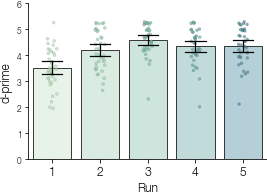

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))
statplot.plot_swarm_bar(
    res.reset_index().query('part == 1'),
    x='run',
    y='dprime',
    dodge=True,
    legend=False,
    point_kind='strip',
    ax=ax,
)
ax.set(ylim=(0, 6), xlabel='Run', ylabel="d-prime")
fig.savefig(os.path.join(fig_dir, 'part1_dprime.pdf'));

In [6]:
part1 = res.query('part == 1')
runs = part1.pivot(index='subject', columns='run', values='dprime')
pg.rm_anova(part1, dv='dprime', within='run', subject='subject')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,run,4,144,31.894377,5.053736e-19,0.469765,0.815958


In [7]:
pg.ttest(runs[1], runs[2], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-6.321663,36,two-sided,2.588415e-07,"[-0.91, -0.47]",0.91354,6.076e+04,0.999713


In [8]:
pg.ttest(runs[2], runs[3], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.989797,36,two-sided,0.000311,"[-0.61, -0.2]",0.591043,88.912,0.937945


In [9]:
pg.ttest(runs[3], runs[4], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.24432,36,two-sided,0.002544,"[0.1, 0.43]",0.411381,13.703,0.682675


In [10]:
pg.ttest(runs[4], runs[5], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.247058,36,two-sided,0.806266,"[-0.19, 0.15]",0.029677,0.182,0.053546


## Part 2

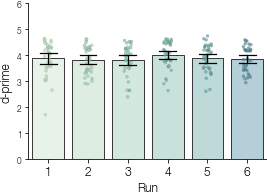

In [11]:
fig, ax = plt.subplots(figsize=(4, 3))
statplot.plot_swarm_bar(
    res.reset_index().query('part == 2'),
    x='run',
    y='dprime',
    dodge=True,
    legend=False,
    point_kind='strip',
    ax=ax,
)
ax.set(ylim=(0, 6), xlabel='Run', ylabel="d-prime")
fig.savefig(os.path.join(fig_dir, 'part2_dprime.pdf'));

In [12]:
part2 = res.query('part == 2')
pg.rm_anova(part2, dv='dprime', within='run', subject='subject')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,run,5,180,1.125039,0.348718,0.030304,0.807415
